<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Librairies" data-toc-modified-id="Librairies-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Librairies</a></span></li><li><span><a href="#Préparation-data" data-toc-modified-id="Préparation-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Préparation data</a></span><ul class="toc-item"><li><span><a href="#Chargement-des-données" data-toc-modified-id="Chargement-des-données-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Chargement des données</a></span></li><li><span><a href="#Fusion--'Title'-et-'Body'" data-toc-modified-id="Fusion--'Title'-et-'Body'-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Fusion  'Title' et 'Body'</a></span></li><li><span><a href="#Retrait-des-balises-html" data-toc-modified-id="Retrait-des-balises-html-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Retrait des balises html</a></span></li><li><span><a href="#Nettoyage-text" data-toc-modified-id="Nettoyage-text-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Nettoyage text</a></span></li><li><span><a href="#Fonction-de-calcul-de-fréquences" data-toc-modified-id="Fonction-de-calcul-de-fréquences-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Fonction de calcul de fréquences</a></span></li><li><span><a href="#Tokenisation" data-toc-modified-id="Tokenisation-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Tokenisation</a></span></li><li><span><a href="#POS-tagging" data-toc-modified-id="POS-tagging-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>POS tagging</a></span></li><li><span><a href="#Lemmatisation" data-toc-modified-id="Lemmatisation-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Lemmatisation</a></span></li><li><span><a href="#Filtrage-des-documents-vides" data-toc-modified-id="Filtrage-des-documents-vides-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Filtrage des documents vides</a></span></li></ul></li><li><span><a href="#Sauvegarde-des-données" data-toc-modified-id="Sauvegarde-des-données-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Sauvegarde des données</a></span></li><li><span><a href="#Analyses" data-toc-modified-id="Analyses-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Analyses</a></span></li></ul></div>

# Librairies

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os, shutil


from bs4 import BeautifulSoup 
import nltk
#from nltk.corpus import stopwords 
#from nltk.stem.porter import PorterStemmer
import re
import pickle
from collections import Counter
import logging

# Import des librairies

#import nltk
#import pickle
#import time
#from sklearn import cluster, metrics
#from sklearn import manifold, decomposition

#
#import re

from wordcloud import WordCloud

logging.disable(logging.WARNING) # disable WARNING, INFO and DEBUG logging everywhere

# mes fonctions
path2 = os.getcwd()
path1 = 'C:\\Users\\clsab\\noteBooks\\utils_ycs'
shutil.copy(path1+'\\YCS_functions.py', path2)
from YCS_functions import *

# Versions
!python --version
import sys
import matplotlib as mpl

print('Version des librairies utilisées :')

print('NumPy                 : ' + np.version.full_version)
print('Pandas                : ' + pd.__version__)
print('Python                : ' + sys.version)
print('Matplotlib            : ' + mpl.__version__)
print('Seaborn               : ' + sns.__version__)
#%pycodestyle_on

Python 3.9.16
Version des librairies utilisées :
NumPy                 : 1.21.4
Pandas                : 1.5.3
Python                : 3.9.16 (main, Mar  8 2023, 10:39:24) [MSC v.1916 64 bit (AMD64)]
Matplotlib            : 3.7.1
Seaborn               : 0.12.2


# Préparation data

## Chargement des données

In [12]:
data = pd.read_csv('data/QueryResults.csv', encoding='latin-1')

In [13]:
# on observe
data.head(3)

,Title,Body,Tags
0,How to convert Decimal to Double in C#?,<p>I want to assign the decimal variable &quot...,<c#><floating-point><type-conversion><double><...
1,Why did the width collapse in the percentage w...,<p>I have an absolutely positioned <code>div</...,<html><css><internet-explorer-7>
2,How do I calculate someone's age based on a Da...,<p>Given a <code>DateTime</code> representing ...,<c#><.net><datetime>


## Fusion  'Title' et 'Body'

Nous allons concatener toutes les saisies de l'utilisateur en une seule variable et créer les listes  'corpus' et 'tags'

In [14]:
%%time
# fusion colonne 'Title' et 'Body'
data['Post'] = data['Title'] + ' ' + data['Body']

# on crée les listes 'corpus et 'tags'
corpus = data['Post'].to_list()
tags = data['Tags'].to_list()

# suppression colonnes 'Tile' et 'Body'
data.drop(columns=['Title', 'Body'],
         inplace=True)

print(f"Nombre d'occurences dans la liste 'corpus': {len(corpus)}")
print(f"Nombre d'occurences dans la liste 'tags': {len(tags)}")

Nombre d'occurences dans la liste 'corpus': 46502
Nombre d'occurences dans la liste 'tags': 46502
CPU times: total: 31.2 ms
Wall time: 40 ms


## Retrait des balises html

Nous allons retirer les balises html dans la liste 'corpus'

In [15]:
def drop_html(text):
    """
    Retrait des balises html
    Args: text(String)
    Return: cleaned String
    """
    import lxml
    import html5lib
    from bs4 import BeautifulSoup
 
    soup = BeautifulSoup(text, "html5lib")
    for elt in soup(['style', 'script']):
            elt.decompose()
    
    return ' '.join(soup.stripped_strings)

In [16]:
%%time
# clean html in corpus list
corpus = [drop_html(text) for text in corpus]

print(f"Nombre d'occurences dans la liste 'corpus': {len(corpus)}")
print(f"Nombre d'occurences dans la liste 'tags': {len(tags)}")


Nombre d'occurences dans la liste 'corpus': 46502
Nombre d'occurences dans la liste 'tags': 46502
CPU times: total: 31.1 s
Wall time: 31.2 s


## Nettoyage text

Pour les analyses futures, nous allons effectuer le traitements suivants:
* Tout en minuscules
* Filtrer sur les textes de plus de 3 caractères

In [18]:
def text_cleaning(text):
    """
    Retrait figures, punctuation,
    filtre sur les mots de plus de 3 lettres,
    tout en minuscules
    
    Args: text(String)
    Return: result(string): Cleaned text
    """
    import re
    
    pattern = re.compile(r'[^\w]|[\d_]')
    
    try: 
        result = re.sub(pattern," ",
                     text).lower()
    except TypeError:
        return text
    
    result = result.split(" ")
    result = list(filter(lambda x: len(x)>3,
                      result))
    result = " ".join(result)
    
    return result

In [19]:
%%time
corpus = [text_cleaning(text) for text in corpus]
tags = [text_cleaning(text).strip() for text in tags]

print(f"Nombre d'occurences dans la liste 'corpus': {len(corpus)}")
print(f"Nombre d'occurences dans la liste 'tags': {len(tags)}")

Nombre d'occurences dans la liste 'corpus': 46502
Nombre d'occurences dans la liste 'tags': 46502
CPU times: total: 3.7 s
Wall time: 3.82 s


## Fonction de calcul de fréquences

In [20]:
def words_freq(listOfList):
    """
    Build distribution of words (frequency)
    Args: List of lists
    Return: word_dist_df(DataFrame)with frequency
    
    """
    
    from nltk import FreqDist
    
    word_list = [token for token_list in listOfList for token in token_list]
    word_dist = FreqDist(word_list)
    word_dist_df = pd.DataFrame(word_dist.items(), columns=['Word', 'Frequency']).set_index('Word')
    word_dist_df.sort_values("Frequency", ascending=False, inplace=True)

    return word_dist_df



## Tokenisation

La **'tokenisation'** permet de transformer le texte saisi par l'utilisateur en liste de termes distincts (token), les termes génériques (stop words) sont supprimés

In [10]:
def tokenize(text):
    """
    Tokenize words of a text
    
    Args: text(String)
    Returns: result(list): Tokenized string
    
    """
    
    from nltk.corpus import stopwords
    from nltk import word_tokenize
    from nltk.tokenize import sent_tokenize

    stop_words = set(stopwords.words('english'))
    
    try:
        result = word_tokenize(text, language='english')
    except TypeError:
        return text
    
    result = [token for token in result if token not in stop_words]
    
    return result

In [11]:
%%time
corpus = [tokenize(text) for text in corpus]
tags = [tokenize(text) for text in tags]

print(f"Nombre d'occurences dans la liste 'corpus': {len(corpus)}")
print(f"Nombre d'occurences dans la liste 'tags': {len(tags)}")

Nombre d'occurences dans la liste 'corpus': 46502
Nombre d'occurences dans la liste 'tags': 46502
CPU times: total: 34.2 s
Wall time: 34.3 s


- **On décide de manière un peu arbitraire de supprimer les 200 mots les plus utilisés**

In [12]:
## liste des 200 mots les plus utilisés
#temp_list = list(words_freq(corpus).head(200).index)
#
## on supprime dans le corpus
#for elt_list in corpus:
#    for elt in elt_list:
#        if elt in temp_list:
#            new_list = elt_list.remove(elt)
#            elt = new_list

<Axes: xlabel='Word'>

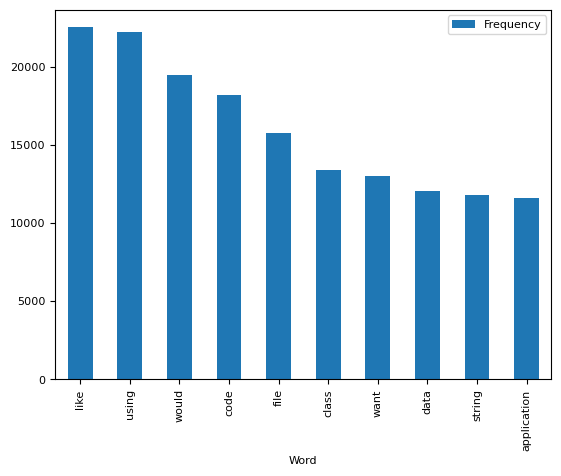

In [13]:
# on visualise
words_freq(corpus).head(10).plot(kind='bar')

<Axes: xlabel='Word'>

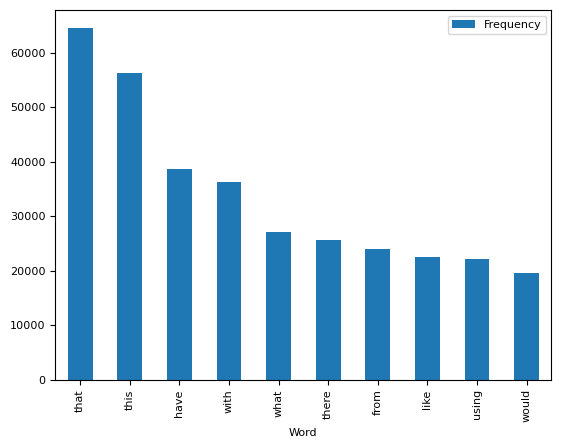

In [24]:
words_freq(corpus_tk).head(10).plot(kind='bar')

## POS tagging

Afin de mieux identifier l'importance des termes utilisés nous allons effectuer un marquage POS  
(probabilité avec chaînes de Markov en fonction du lien grammatical).  

In [14]:
def filtering_nouns(tokens):
    """
    Filter singular nouns
    
    Args: tokens(list)
    Return: result(list): Filtered token list
    
    """ 
    
    import nltk
    result = nltk.pos_tag(tokens)
    result = [token[0] for token in result if token[1] == 'NN']
    
    return result

In [15]:
%%time
corpus = [filtering_nouns(tokens) for tokens in corpus]

print(f"Nombre d'occurences dans la liste 'corpus': {len(corpus)}")
print(f"Nombre d'occurences dans la liste 'tags': {len(tags)}")

Nombre d'occurences dans la liste 'corpus': 46502
Nombre d'occurences dans la liste 'tags': 46502
CPU times: total: 2min 20s
Wall time: 2min 20s


<Axes: xlabel='Word'>

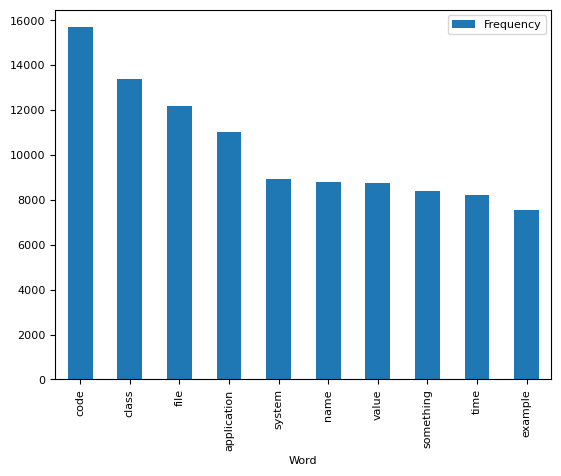

In [16]:
# on visualise
words_freq(corpus).head(10).plot(kind='bar')

## Lemmatisation

Suppression des multiples déclinaisons d’un même terme (conjugaisons, féminin, pluriel …)

In [17]:
def lemmatization(tokens):
    """
    Transform tokens into lems 
    Args: tokens(list)   
    Return: result(list): List of lemmatized tokens
    
    """
    import nltk
    from nltk.stem import WordNetLemmatizer
    
    lemmatizer = WordNetLemmatizer()
    
    result = []
    for token in tokens:
        result.append(lemmatizer.lemmatize(token))
        
    return result

In [18]:
%%time

# lemmatisation
corpus = [lemmatization(tokens) for tokens in corpus]
tags = [lemmatization(tokens) for tokens in tags]

# suppression des 'blancs'
tags_wo_blanks = []

for tokens in tags:
    tokens = [token for token in tokens if len(token)>1]
    tags_wo_blanks.append(tokens)
    
tags = tags_wo_blanks

print(f"Nombre d'occurences dans la liste 'corpus': {len(corpus)}")
print(f"Nombre d'occurences dans la liste 'tags': {len(tags)}")


Nombre d'occurences dans la liste 'corpus': 46502
Nombre d'occurences dans la liste 'tags': 46502
CPU times: total: 4.77 s
Wall time: 4.78 s


<Axes: xlabel='word_tags'>

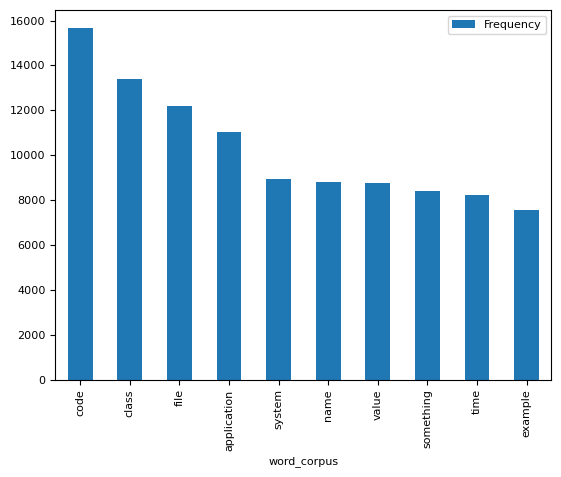

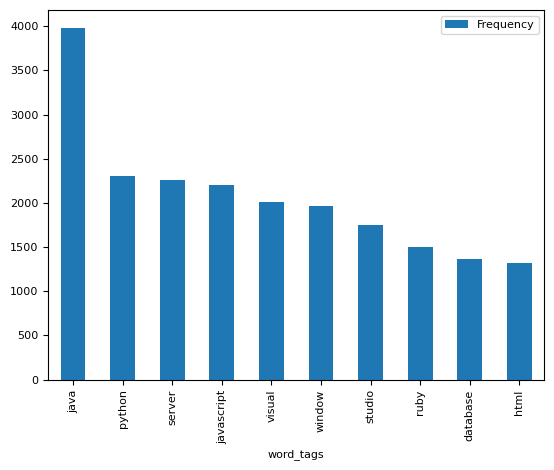

In [19]:
# onvisualise
words_freq(corpus).head(10).plot(kind='bar', xlabel='word_corpus')
words_freq(tags).head(10).plot(kind='bar', xlabel='word_tags')

## Filtrage des documents vides

Les divers traitements précédents ont généré des documents vides que nous allons supprimer

In [20]:
print(f"Observations restante du corpus original: {data.shape[0]}")

joined_corpus = [" ".join(text) for text in corpus]
corpus_df = pd.DataFrame(joined_corpus,
                         columns=['one_text'])
corpus_df['len_text'] = corpus_df['one_text'].apply(lambda x: len(x))

joined_tags = [" ".join(tags) for tags in tags]
tag_df = pd.DataFrame(joined_tags,
                      columns=['one_tag'])
tag_df['len_tags'] = tag_df['one_tag'].apply(lambda x: len(x))

corpus_tag_df = pd.concat([corpus_df, tag_df], axis=1)

empty_data_idx = corpus_tag_df[(
    corpus_tag_df['len_text']==0)
    | (corpus_tag_df['len_tags']==0)].index

corpus_tag_df.drop(index=empty_data_idx,
                   inplace=True)

data.drop(index=empty_data_idx,
          inplace=True)

print(f"Nombre d'observations du corpus traité: \
    {corpus_tag_df.shape[0]}")

corpus_tag_df['splitted_text'] = \
    corpus_tag_df['one_text'].apply(lambda x: x.split(' '))

corpus_tag_df['splitted_tags'] = \
    corpus_tag_df['one_tag'].apply(lambda x: x.split(' ') )

filtered_corpus = corpus_tag_df['splitted_text'].to_list()
filtered_tags = corpus_tag_df['splitted_tags'].to_list()
filtered_original_posts = data['Post'].to_list()

cleaned_data = pd.concat([data['Post'],
                          corpus_tag_df['splitted_text'],
                          corpus_tag_df['splitted_tags']],
                         axis=1)

cleaned_data.head(10)

Observations restante du corpus original: 46502
Nombre d'observations du corpus traité:     43798


,Post,splitted_text,splitted_tags
0,How to convert Decimal to Double in C#? <p>I w...,"[convert, decimal, assign, opacity, value, opa...","[floating, point, type, conversion, double, de..."
1,Why did the width collapse in the percentage w...,"[width, collapse, percentage, width, child, el...","[html, internet, explorer]"
2,How do I calculate someone's age based on a Da...,"[calculate, someone, birthday, person, calculate]",[datetime]
3,Calculate relative time in C# <p>Given a speci...,"[time, datetime, value, time, month]","[datetime, time, datediff, relative, time, span]"
4,Determine a user's timezone <p>Is there a stan...,"[user, standard, server, determine, user, time...","[html, browser, timezone, user, agent, timezon..."
5,Difference between Math.Floor() and Math.Trunc...,"[difference, math, floor, math, truncate, diff...",[math]
6,Filling a DataSet or a DataTable from a LINQ q...,"[dataset, linq, query, result, query, asmx, se...","[linq, service]"
7,Binary Data in MySQL <p>How do I store binary ...,[mysql],"[mysql, database, binary, data, data, storage]"
8,What is the fastest way to get the value of Ï...,"[value, value, challenge, define, number, prog...","[performance, algorithm, language, agnostic, u..."
9,Throw an error preventing a table update in a ...,"[error, mysql, trigger, trigger, throw, error,...","[mysql, database, trigger]"


# Sauvegarde des données

In [21]:
cleaned_data.to_csv("./data/cleaned_corpus.csv", index=False)
cleaned_data.to_pickle('./data/cleaned_corpus.pkl')

# Analyses

* Les différentes analyses seront effectuées dans le notebook 'modelisation' préalablement aux tentatives de classification supervisée et non supervivisée
* Les resultats de ces analyses permettront de statuer sur une réduction des données